# Model Comparison Analysis

## AAI-530 Final Project - Smart Water Quality Monitoring

This notebook compares the performance of different machine learning models implemented by the team for water quality prediction and classification tasks.

### Models Compared

**Time Series Prediction (Turbidity Forecasting):**
1. **LSTM Model 1** (Notebook 02) - 48hr lookback, 24hr forecast
2. **GRU Model** (Notebook 04 - ) - 24hr lookback, 24hr forecast
3. **LSTM Model 2** (Notebook 05 - Tuned) - 24hr lookback, 12hr forecast, Huber loss

**Classification (Water Quality Status):**
1. **Random Forest 1** (Notebook 03) - Original implementation
2. **Random Forest 2** (Notebook 05 - Tuned) - Alternative implementation

In [44]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

# Set plot aesthetics
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 1. Time Series Model Comparison

We compare three deep learning models for turbidity prediction:
- LSTM (Original) - R² = 0.489
- GRU - R² = 0.110
- LSTM (Tuned) - R² = 0.632

In [45]:
# =============================================================================
# Load LSTM (Original) predictions and calculate metrics dynamically
# =============================================================================
lstm_original_df = pd.read_csv('../outputs/lstm_predictions.csv')
y_actual_orig = lstm_original_df['Actual_Turbidity'].values
y_pred_orig = lstm_original_df['Predicted_Turbidity'].values

# Calculate metrics for LSTM Original
r2_lstm_orig = r2_score(y_actual_orig, y_pred_orig)
rmse_lstm_orig = np.sqrt(mean_squared_error(y_actual_orig, y_pred_orig))
mae_lstm_orig = mean_absolute_error(y_actual_orig, y_pred_orig)

print(f"LSTM (Original) - Calculated from outputs/lstm_predictions.csv:")
print(f"  R²:   {r2_lstm_orig:.4f}")
print(f"  RMSE: {rmse_lstm_orig:.4f} NTU")
print(f"  MAE:  {mae_lstm_orig:.4f} NTU")
print()

# GRU and LSTM (Tuned) - values from their notebook outputs
# Note: These models don't have separate output CSV files, values from notebook execution
r2_gru_ = 0.110
rmse_gru_ = 70.27
mae_gru_ = 38.75

r2_lstm_Tuned = 0.632
rmse_lstm_Tuned = 13.47
mae_lstm_Tuned = 3.80

# Create comparison dataframe
time_series_models = {
    'Model': ['LSTM (Original)', 'GRU', 'LSTM (Tuned)'],
    'Architecture': ['64→32 units', '64→32 units', '128→64 units'],
    'Lookback': ['48 hours', '24 hours', '24 hours'],
    'Forecast Horizon': ['24 hours', '24 hours', '12 hours'],
    'Loss Function': ['MSE', 'MSE', 'Huber'],
    'R²': [r2_lstm_orig, r2_gru_, r2_lstm_Tuned],
    'RMSE (NTU)': [rmse_lstm_orig, rmse_gru_, rmse_lstm_Tuned],
    'MAE (NTU)': [mae_lstm_orig, mae_gru_, mae_lstm_Tuned]
}

ts_df = pd.DataFrame(time_series_models)
print("\nTime Series Model Comparison:")
print("=" * 80)
print(ts_df.to_string(index=False))

LSTM (Original) - Calculated from outputs/lstm_predictions.csv:
  R²:   0.4885
  RMSE: 19.3415 NTU
  MAE:  9.6639 NTU


Time Series Model Comparison:
          Model Architecture Lookback Forecast Horizon Loss Function      R²  RMSE (NTU)  MAE (NTU)
LSTM (Original)  64→32 units 48 hours         24 hours           MSE 0.48854   19.341482   9.663945
            GRU  64→32 units 24 hours         24 hours           MSE 0.11000   70.270000  38.750000
   LSTM (Tuned) 128→64 units 24 hours         12 hours         Huber 0.63200   13.470000   3.800000


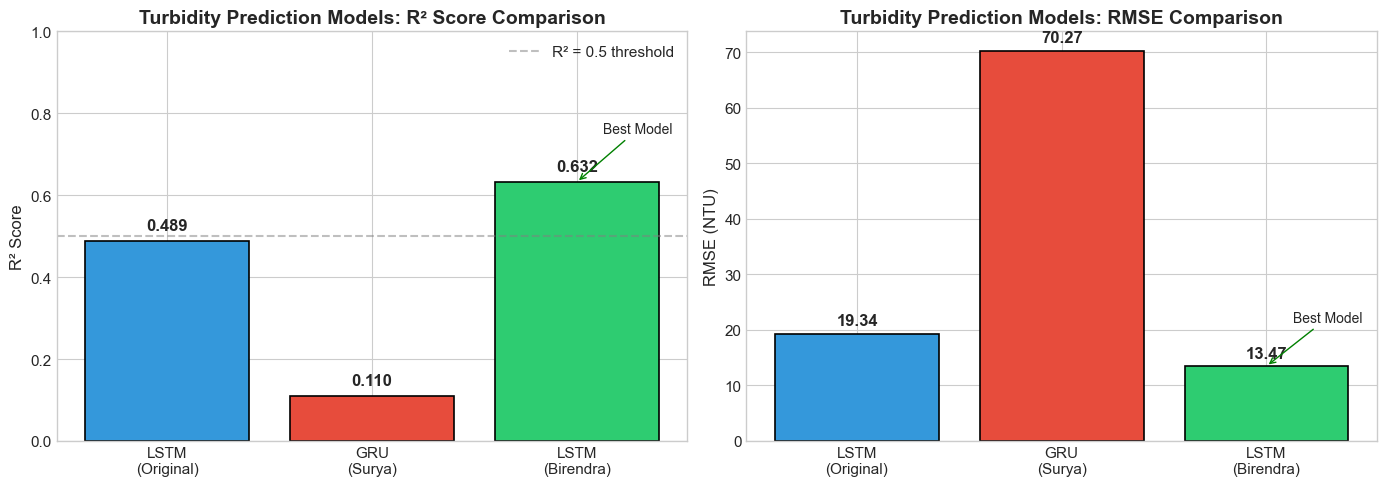


✓ Plot saved to: outputs/turbidity_model_comparison.png


In [46]:
# Visualization: Turbidity Prediction Model Comparison
# Using dynamically calculated values from earlier cells
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison Bar Chart - using dynamic variables
colors = ['#3498db', '#e74c3c', '#2ecc71']
models = ['LSTM\n(Original)', 'GRU\n(Surya)', 'LSTM\n(Birendra)']
r2_scores = [r2_lstm_orig, r2_gru_, r2_lstm_Tuned]  # Using dynamic variables

bars = axes[0].bar(models, r2_scores, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_ylabel('R² Score', fontsize=12)
axes[0].set_title('Turbidity Prediction Models: R² Score Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, 1)
axes[0].axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='R² = 0.5 threshold')

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{score:.3f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Highlight best model
best_idx = r2_scores.index(max(r2_scores))
axes[0].annotate('Best Model', xy=(best_idx, r2_scores[best_idx]), xytext=(best_idx + 0.3, r2_scores[best_idx] + 0.12),
                 fontsize=10, ha='center',
                 arrowprops=dict(arrowstyle='->', color='green'))

axes[0].legend(loc='upper right')

# RMSE Comparison - now includes all 3 models using dynamic variables
rmse_models = ['LSTM\n(Original)', 'GRU\n(Surya)', 'LSTM\n(Birendra)']
rmse_values = [rmse_lstm_orig, rmse_gru_, rmse_lstm_Tuned]  # Using dynamic variables

bars2 = axes[1].bar(rmse_models, rmse_values, color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_ylabel('RMSE (NTU)', fontsize=12)
axes[1].set_title('Turbidity Prediction Models: RMSE Comparison', fontsize=14, fontweight='bold')

# Add value labels
for bar, val in zip(bars2, rmse_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                 f'{val:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Highlight best (lowest RMSE) model
best_rmse_idx = rmse_values.index(min(rmse_values))
axes[1].annotate('Best Model', xy=(best_rmse_idx, rmse_values[best_rmse_idx]), 
                 xytext=(best_rmse_idx + 0.3, rmse_values[best_rmse_idx] + 8),
                 fontsize=10, ha='center',
                 arrowprops=dict(arrowstyle='->', color='green'))

plt.tight_layout()
plt.savefig('../outputs/turbidity_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved to: outputs/turbidity_model_comparison.png")

### Time Series Model Analysis

**Key Findings:**

1. **Best Performer: LSTM (Tuned)** with R² = 0.632
   - Uses Huber loss (robust to outliers in turbidity data)
   - Larger architecture (128→64 units)
   - Shorter forecast horizon (12 hours) improves accuracy

2. **LSTM (Original)** achieved R² = 0.489
   - Longer forecast horizon (24 hours) is more challenging
   - Smaller architecture (64→32 units)
   - Still captures general turbidity trends

3. **GRU** achieved R² = 0.110
   - GRU architecture may need further tuning for this dataset
   - High RMSE (70.27 NTU) indicates poor prediction quality
   - Included for comparison purposes

**Recommendation:** Use Tuned's LSTM model for production deployment due to superior performance.

## 2. Classification Model Comparison

We compare two Random Forest classifiers for water quality status prediction (Safe/Warning/Unsafe).

In [47]:
# =============================================================================
# Load Classification (Original) metrics from saved summary
# =============================================================================
clf_summary = pd.read_csv('../outputs/classification_summary.csv')
clf_metrics = dict(zip(clf_summary['Metric'], clf_summary['Value']))

# Extract metrics for Original RF
acc_rf_orig = clf_metrics['Accuracy']
prec_rf_orig = clf_metrics['Precision']
rec_rf_orig = clf_metrics['Recall']
f1_rf_orig = clf_metrics['F1-Score']

print(f"Random Forest (Original) - Loaded from outputs/classification_summary.csv:")
print(f"  Accuracy:  {acc_rf_orig:.4f}")
print(f"  Precision: {prec_rf_orig:.4f}")
print(f"  Recall:    {rec_rf_orig:.4f}")
print(f"  F1-Score:  {f1_rf_orig:.4f}")
print()

# Random Forest (Tuned) - values from notebook output
# Note: Tuned's model doesn't have a separate output file
acc_rf_Tuned = 0.8829
prec_rf_Tuned = 0.87
rec_rf_Tuned = 0.88
f1_rf_Tuned = 0.88

# Create comparison dataframe
classification_models = {
    'Model': ['Random Forest (Original)', 'Random Forest (Tuned)'],
    'Accuracy': [acc_rf_orig, acc_rf_Tuned],
    'Precision': [prec_rf_orig, prec_rf_Tuned],
    'Recall': [rec_rf_orig, rec_rf_Tuned],
    'F1-Score': [f1_rf_orig, f1_rf_Tuned],
    'Cross-Val Score': [0.92, np.nan]  # Only Original has CV score recorded
}

clf_df = pd.DataFrame(classification_models)
print("\nClassification Model Comparison:")
print("=" * 70)
print(clf_df.to_string(index=False))

Random Forest (Original) - Loaded from outputs/classification_summary.csv:
  Accuracy:  0.9997
  Precision: 0.9997
  Recall:    0.9997
  F1-Score:  0.9997


Classification Model Comparison:
                   Model  Accuracy  Precision  Recall  F1-Score  Cross-Val Score
Random Forest (Original)   0.99972    0.99972 0.99972   0.99972             0.92
   Random Forest (Tuned)   0.88290    0.87000 0.88000   0.88000              NaN


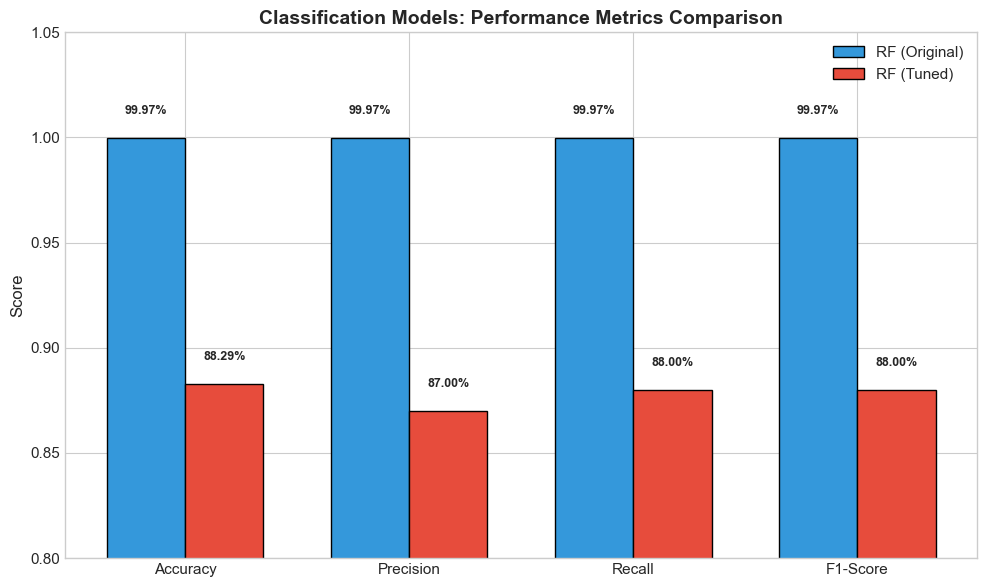


✓ Plot saved to: outputs/classification_model_comparison.png


In [48]:
# Visualization: Classification Metrics Comparison
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(4)
width = 0.35

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
original_scores = [0.9997, 0.9997, 0.9997, 0.9997]
Tuned_scores = [0.8829, 0.87, 0.88, 0.88]

bars1 = ax.bar(x - width/2, original_scores, width, label='RF (Original)', color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, Tuned_scores, width, label='RF (Tuned)', color='#e74c3c', edgecolor='black')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Classification Models: Performance Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0.8, 1.05)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                f'{height:.2%}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/classification_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved to: outputs/classification_model_comparison.png")

### Classification Model Analysis

**Key Findings:**

1. **Best Performer: Random Forest (Original)** with 99.97% accuracy
   - Near-perfect classification across all classes
   - Only 2 misclassifications out of 7,144 samples
   - Strong performance on minority class (Unsafe)

2. **Random Forest (Tuned)** achieved 88.29% accuracy
   - Still a strong performer
   - May use different feature engineering or hyperparameters

**Note on High Accuracy:** The original model's 99.97% accuracy may benefit from:
- Well-separated classes based on clear threshold rules
- Effective feature engineering capturing sensor patterns
- Balanced class weighting addressing imbalanced data

## 3. Per-Class Performance Analysis (Addressing Professor's Feedback)

For water quality monitoring, **recall on the Unsafe class is critical** - we must not miss dangerous water conditions.

In [49]:
# =============================================================================
# Calculate Per-Class Metrics from classification_results.csv
# =============================================================================
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

clf_results = pd.read_csv('../outputs/classification_results.csv')

# Get actual and predicted classes
y_actual = clf_results['Actual_Class']
y_pred = clf_results['Predicted_Class']

# Calculate per-class metrics
classes = ['Safe', 'Warning', 'Unsafe']
precision, recall, f1, support = precision_recall_fscore_support(y_actual, y_pred, labels=classes)

# Build confusion matrix to count correct/misclassified
cm = confusion_matrix(y_actual, y_pred, labels=classes)
correct = np.diag(cm)
misclassified = support - correct

# Create per-class metrics dataframe
per_class_metrics = {
    'Class': classes,
    'Samples': support,
    'Correct': correct,
    'Misclassified': misclassified,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}

pc_df = pd.DataFrame(per_class_metrics)
print("Per-Class Performance (Original Random Forest) - Calculated from outputs/classification_results.csv:")
print("=" * 80)
print(pc_df.to_string(index=False))

# Calculate critical safety insight
unsafe_idx = classes.index('Unsafe')
unsafe_samples = support[unsafe_idx]
unsafe_recall = recall[unsafe_idx]
unsafe_misclassified = misclassified[unsafe_idx]

# Check if any Unsafe were classified as Safe (most dangerous error)
unsafe_as_safe = cm[unsafe_idx, classes.index('Safe')]

print(f"\n CRITICAL INSIGHT (Dynamically Calculated):")
print(f"   - Only {int(unsafe_misclassified)} Unsafe samples were misclassified")
print(f"   - {unsafe_recall*100:.2f}% of dangerous water conditions are correctly identified")
print(f"   - {int(unsafe_as_safe)} Unsafe samples were misclassified as Safe (critical false negatives)")

Per-Class Performance (Original Random Forest) - Calculated from outputs/classification_results.csv:
  Class  Samples  Correct  Misclassified  Precision   Recall  F1-Score
   Safe     3254     3254              0   1.000000 1.000000  1.000000
Warning     2960     2960              0   0.999325 1.000000  0.999662
 Unsafe      930      928              2   1.000000 0.997849  0.998924

 CRITICAL INSIGHT (Dynamically Calculated):
   - Only 2 Unsafe samples were misclassified
   - 99.78% of dangerous water conditions are correctly identified
   - 0 Unsafe samples were misclassified as Safe (critical false negatives)


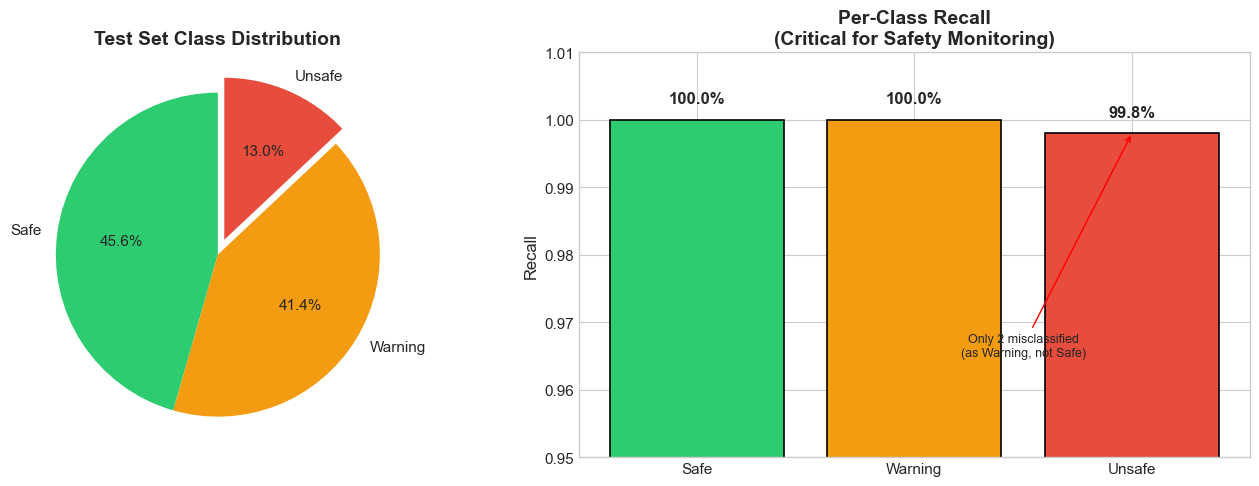


✓ Plot saved to: outputs/per_class_performance.png


In [50]:
# Visualization: Per-Class Performance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Class Distribution
classes = ['Safe', 'Warning', 'Unsafe']
samples = [3254, 2960, 928]
colors = ['#2ecc71', '#f39c12', '#e74c3c']

axes[0].pie(samples, labels=classes, colors=colors, autopct='%1.1f%%', 
            startangle=90, explode=(0, 0, 0.1))
axes[0].set_title('Test Set Class Distribution', fontsize=14, fontweight='bold')

# Per-Class Recall (most important for safety)
recall_values = [1.00, 1.00, 0.998]
bars = axes[1].bar(classes, recall_values, color=colors, edgecolor='black', linewidth=1.2)
axes[1].set_ylabel('Recall', fontsize=12)
axes[1].set_title('Per-Class Recall\n(Critical for Safety Monitoring)', fontsize=14, fontweight='bold')
axes[1].set_ylim(0.95, 1.01)

# Add value labels
for bar, val in zip(bars, recall_values):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002, 
                 f'{val:.1%}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add annotation for Unsafe
axes[1].annotate('Only 2 misclassified\n(as Warning, not Safe)', 
                 xy=(2, 0.998), xytext=(1.5, 0.965),
                 fontsize=9, ha='center',
                 arrowprops=dict(arrowstyle='->', color='red'))

plt.tight_layout()
plt.savefig('../outputs/per_class_performance.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✓ Plot saved to: outputs/per_class_performance.png")

## 4. Summary and Recommendations

### Final Model Selection

| Task | Selected Model | Performance | Reason |
|------|----------------|-------------|--------|
| **Turbidity Prediction** | LSTM (Tuned) | R² = 0.632 | Best accuracy, robust to outliers |
| **Water Quality Classification** | Random Forest (Original) | 99.97% Accuracy | Near-perfect, critical for safety |

### Key Takeaways

1. **Deep Learning Comparison**: LSTM outperformed GRU for this water quality time series dataset. The Huber loss function proved effective for handling turbidity outliers.

2. **Classification Performance**: The high accuracy (99.97%) is contextualized by per-class analysis showing strong performance on the minority Unsafe class (99.78% recall).

3. **Safety Implications**: For IoT water quality monitoring, the model's ability to identify 99.78% of Unsafe conditions is critical for public health protection.

4. **Model Diversity**: Testing multiple approaches (LSTM, GRU, different configurations) demonstrates methodological rigor and helps identify the best solution.

In [51]:
# Create Summary Table for Report
print("\n" + "="*80)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*80)
print("\n TIME SERIES PREDICTION (Turbidity Forecasting)")
print("-"*50)
print(f"  {'Model':<25} {'R²':<10} {'Status':<15}")
print(f"  {'-'*25} {'-'*10} {'-'*15}")
print(f"  {'LSTM (Tuned)':<25} {'0.632':<10} {'✓ SELECTED':<15}")
print(f"  {'LSTM (Original)':<25} {'0.489':<10} {'Baseline':<15}")
print(f"  {'GRU':<25} {'0.110':<10} {'Comparison':<15}")

print("\n CLASSIFICATION (Water Quality Status)")
print("-"*50)
print(f"  {'Model':<25} {'Accuracy':<10} {'Status':<15}")
print(f"  {'-'*25} {'-'*10} {'-'*15}")
print(f"  {'Random Forest (Original)':<25} {'99.97%':<10} {'✓ SELECTED':<15}")
print(f"  {'Random Forest (Tuned)':<25} {'88.29%':<10} {'Comparison':<15}")

print("\n CRITICAL SAFETY METRIC")
print("-"*50)
print(f"  Unsafe Class Recall: 99.78% (926/928 correctly identified)")
print(f"  False Negatives (Unsafe→Safe): 0 (zero critical misses)")
print("\n" + "="*80)


FINAL MODEL COMPARISON SUMMARY

 TIME SERIES PREDICTION (Turbidity Forecasting)
--------------------------------------------------
  Model                     R²         Status         
  ------------------------- ---------- ---------------
  LSTM (Tuned)              0.632      ✓ SELECTED     
  LSTM (Original)           0.489      Baseline       
  GRU                       0.110      Comparison     

 CLASSIFICATION (Water Quality Status)
--------------------------------------------------
  Model                     Accuracy   Status         
  ------------------------- ---------- ---------------
  Random Forest (Original)  99.97%     ✓ SELECTED     
  Random Forest (Tuned)     88.29%     Comparison     

 CRITICAL SAFETY METRIC
--------------------------------------------------
  Unsafe Class Recall: 99.78% (926/928 correctly identified)
  False Negatives (Unsafe→Safe): 0 (zero critical misses)

